In [1]:
# Proyecto 04

# Pasos a seguir proyecto 03:
# Como pasos a seguir se deberían volver a correr los modelos
# incluyendo el año 2020 y buscando obtener un modelo más preciso para pronosticar el 2021 
# Este contaria con datos registrados durante la coyuntura (COVID)
# Se esperaría un modelo más preciso, ya que incluye datos de un evento inesperado
# El modelo se ajustaría de mejor manera a la realidad
# Las herramientas que nos podria ayudar en esta nueva construcción de modelo serian: 
# Facebook prophet y/o las Redes Neuronales y ver que comportamiento nos muestra el modelo nuevo
# Para los resultado debemos seguir teniendo en cuenta que capturar una tendencia 
# de acuerdo a data del pasado tiene riesgos y estos riesgos son: las externalidades
# ya que estas pueden ocurrir sin avisar, son eventos exogenos que no se contemplen en data registrada en el pasado
# y afecten la tendencia que queremos pronosticar
# por esto queremos incluir data del 2020 y evaluar si logramos un modelo con tendencia más cercana a la realidad

# Resumen:
# se utiliza libreria Facebook Prophet, se contruye red neuronal, y comparamos resultados con modelo de proyecto 03
# Se incluye data de la coyuntura COVID 2020

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
data17 = pd.read_csv('flujo-vehicular-2017.csv', sep= ",")
data18 = pd.read_csv('flujo-vehicular-2018.csv', sep= ",")
data19 = pd.read_csv('flujo-vehicular-2019.csv', sep= ",")

In [4]:
data19.info()
data19.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [5]:
data18.info()
data18.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [6]:
data17.info()
data17.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [7]:
print(data17['estacion'].unique())
print(data18['estacion'].unique())
print(data19['estacion'].unique())

# Estaciones para 2019 cambian, se desconoce si cambia solo en nombre 
# o si desaparecen estaciones o si es la data se recoge de forma diferente

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']


In [8]:
print(data17['sentido'].unique())
print(data18['sentido'].unique())
print(data19['sentido'].unique())

# Mismos sentido, dado que en 3 años es dificil generar infraestructura en corto plazo

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data17['tipo_vehiculo'].unique())
print(data18['tipo_vehiculo'].unique())
print(data19['tipo_vehiculo'].unique())

# Misma clasificacion de vahiculos

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data17['forma_pago'].unique())
print(data18['forma_pago'].unique())
print(data19['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']


In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data19, data18, data17])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

df = dataset
df.head()

# Trabajeremos con estacion Illia y forma de pago en efectivo

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [12]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
df['fecha2'] = pd.to_datetime(df.fecha) + pd.to_timedelta(df.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
df.drop(columns=['fecha','hora_fin'], inplace = True)

df.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Corregimos el nombre de fecha2 a fecha
df.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
# Ordenamos por fecha
df.sort_values('fecha', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


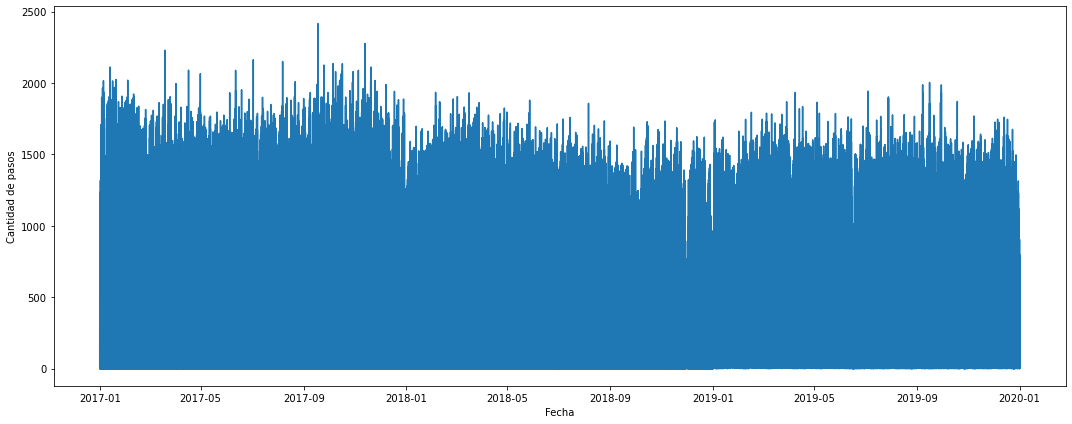

In [15]:
# Grafico de datos tal y como estan
plt.figure(figsize = (15,6))
plt.plot(df.fecha, df.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.tight_layout()
plt.show()

In [16]:
# Resampleo Diario para mejor visualizacion
diario= df.resample('D', on='fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


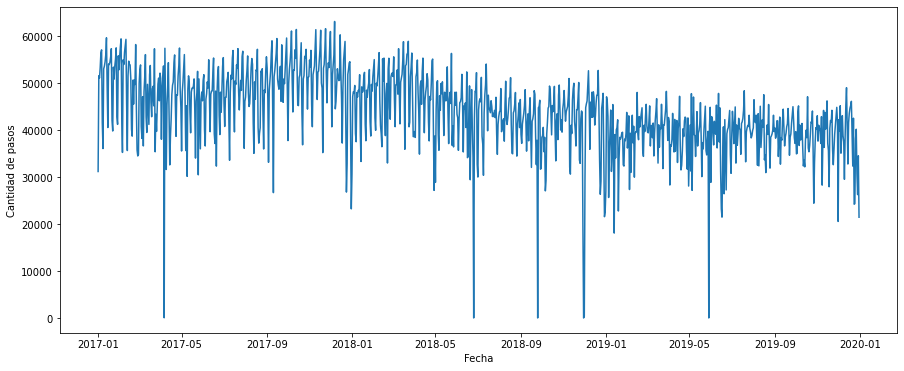

In [17]:
plt.figure(figsize=(15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

In [18]:
print(df.isnull().sum())

# No hay datos faltantes

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64


In [19]:
# Cortaremos los outliers de acuerdo a estudio del proyecto anterior
# Estos pico de data son causador por razones exogenas, por eso no los consideramos relevantes para la serie

falta= diario.copy()
falta= diario[diario.cantidad_pasos <= 15000]
falta

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


In [20]:
diario.cantidad_pasos[diario.cantidad_pasos<= 15000]= np.nan
print(diario.isnull().sum())

cantidad_pasos    6
dtype: int64


In [21]:
diario= diario.interpolate(method='nearest', k=2)
diario.isnull().sum()

cantidad_pasos    0
dtype: int64

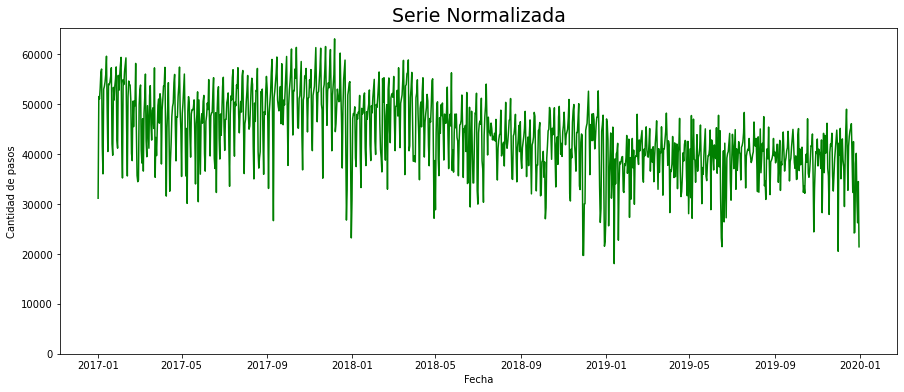

In [22]:
plt.figure(figsize=(15,6))
plt.plot(diario.index, diario.cantidad_pasos, color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Serie Normalizada', size= 19)
plt.ylim(0)
plt.show()

In [23]:
# Ahora incluimos el año 2020
# Año atipico por el COVID 19: restricciones de movilidad y cuarentenas

In [24]:
data_20 = pd.read_csv('flujo-vehicular-2020.csv', sep=',')
data20= data_20[data_20.estacion== 'ILLIA']
data20.describe(include='all')

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
count,296053.0,296053,296053,296053,296053.000000,296053.000000,296053.000000,296053,296053,296053,296053,296053,296053.000000
unique,NaN,366,12,7,NaN,NaN,NaN,1,12,8,22,2,NaN
top,NaN,2020-02-21 00:00:00,enero,Miércoles,NaN,NaN,NaN,ILLIA,Auto,Tag,Tag - PosPago,Centro,NaN
freq,NaN,1212,31057,46632,NaN,NaN,NaN,296053,133478,135838,66258,153134,NaN
mean,2020.0,NaN,NaN,NaN,15.717733,12.158566,12.406268,NaN,NaN,NaN,NaN,NaN,60.665192
std,0.0,NaN,NaN,NaN,8.779484,6.243732,6.337303,NaN,NaN,NaN,NaN,NaN,191.956546
min,2020.0,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2020.0,NaN,NaN,NaN,8.000000,7.000000,8.000000,NaN,NaN,NaN,NaN,NaN,1.000000
50%,2020.0,NaN,NaN,NaN,16.000000,12.000000,13.000000,NaN,NaN,NaN,NaN,NaN,4.000000
75%,2020.0,NaN,NaN,NaN,23.000000,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,20.000000


In [25]:
# Tipos de pago y cantidades para año 2020

print(data20['forma_pago'].unique())
print(data20.forma_pago.value_counts())

# Pago en efectivo viene cayendo
# Comportamiento esperado por avances tecnologicos como pago automaticos (tag)
# y por Covid y medidas para prevenir contagios

['Efectivo' 'Exento' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Violación'
 'CPP' 'Mercado Pago']
Tag                  135838
Efectivo              52374
Violación             37272
Rec.Deuda             30694
Exento                23745
Tarjeta Magnética     10899
CPP                    2913
Mercado Pago           2318
Name: forma_pago, dtype: int64


In [27]:
dat20 = data_20[(data_20.estacion == 'ILLIA') & (data_20.forma_pago== 'Efectivo')]
dat20

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
52,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Efectivo,Efectivo,Centro,326.0
53,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Efectivo,Efectivo,Provincia,319.0
134,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,2.0,ILLIA,Auto,Efectivo,Efectivo,Centro,199.0
135,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,2.0,ILLIA,Auto,Efectivo,Efectivo,Provincia,180.0
202,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,2.0,3.0,ILLIA,Auto,Efectivo,Efectivo,Centro,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532216,2020.0,2020-12-24,diciembre,Jueves,24.0,11.0,12.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1.0
2532227,2020.0,2020-12-24,diciembre,Jueves,24.0,12.0,13.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1.0
2532271,2020.0,2020-12-24,diciembre,Jueves,24.0,17.0,18.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Centro,1.0
2532928,2020.0,2020-12-28,diciembre,Lunes,28.0,12.0,13.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1.0


In [28]:
dat20.describe(include='all')

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
count,52374.0,52374,52374,52374,52374.000000,52374.000000,52374.000000,52374,52374,52374,52374,52374,52374.000000
unique,NaN,307,11,7,NaN,NaN,NaN,1,12,1,1,2,NaN
top,NaN,2020-02-10 00:00:00,enero,Miércoles,NaN,NaN,NaN,ILLIA,Auto,Efectivo,Efectivo,Provincia,NaN
freq,NaN,240,6536,7954,NaN,NaN,NaN,52374,14609,52374,52374,26748,NaN
mean,2020.0,NaN,NaN,NaN,15.659201,11.952324,12.102742,NaN,NaN,NaN,NaN,NaN,93.221579
std,0.0,NaN,NaN,NaN,8.789561,6.476084,6.544925,NaN,NaN,NaN,NaN,NaN,202.295918
min,2020.0,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2020.0,NaN,NaN,NaN,8.000000,7.000000,7.000000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,2020.0,NaN,NaN,NaN,16.000000,12.000000,12.000000,NaN,NaN,NaN,NaN,NaN,11.000000
75%,2020.0,NaN,NaN,NaN,23.000000,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,66.000000


In [29]:
# Quitamos las columnas que no utilizaremos
dat20.drop(columns=['periodo', 'hora_inicio', 'estacion', 'tipo_vehiculo', 'forma_pago', 'observacion', 'sentido', 'dia_fecha'], inplace=True)
# Pasamos la columna de fecha a formato de datetime y le ponemos hora_fin como hora
dat20['fecha2']= pd.to_datetime(dat20.fecha)+ pd.to_timedelta(dat20.hora_fin, unit='h')
# Quitamos las columnas fecha y hora_fin
dat20.drop(columns=['fecha', 'hora_fin'], inplace=True)
# Cambiamos el nombre de fecha2 por fecha
dat20.rename(columns={'fecha2':'fecha'}, inplace=True)
# Ordenamos la fecha
dat20.sort_values('fecha', inplace=True)
dat20.reset_index(drop=True, inplace=True)
# Y por ultimo resampleamos por dia
diario20 = dat20.resample('D', on='fecha').sum()
diario20

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-29-980941af9d51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat20['fecha2']= pd.to_datetime(dat20.fecha)+ pd.to_timedelta(dat20.hora_fin, unit='h')
/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

,cantidad_pasos
fecha,
2020-01-01,21395.0
2020-01-02,33722.0
2020-01-03,37067.0
2020-01-04,30627.0
2020-01-05,27812.0
...,...
2020-12-27,8434.0
2020-12-28,10311.0
2020-12-29,12036.0


In [30]:
# Verificamos los datos faltantes
diario20.isnull().sum()

cantidad_pasos    0
dtype: int64

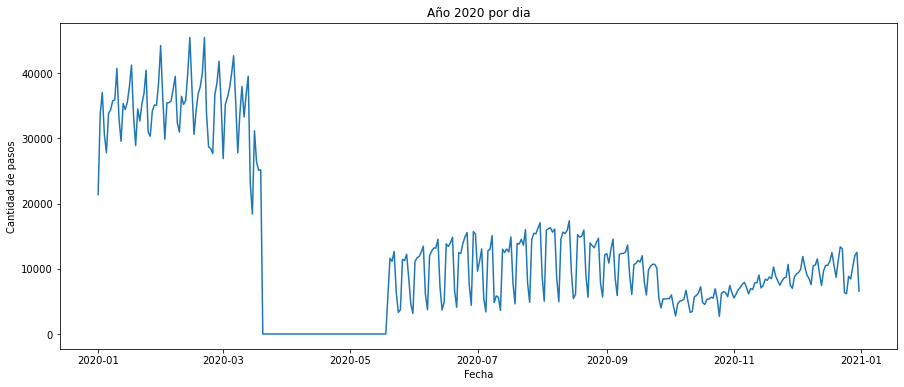

In [31]:
# Graficamos
plt.figure(figsize=(15,6))
plt.plot(diario20.index, diario20.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Año 2020 por dia')
plt.show()

# El choque exogeno de COVID es evidente apartir de mes de marzo, y el golpe general en la movilidad se ve para el resto de año.

In [32]:
# Tag vs Efectivo
# Buscamos ver graficamente como aumenta el medio de pago tag y como disminuye el efectivo.

sema_20 = diario20.resample('W').mean()
print(sema_20.shape)
sema_20

(53, 1)


,cantidad_pasos
fecha,
2020-01-05,30124.600000
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


In [33]:
# Tag

tele20 = data20[(data20.estacion== 'ILLIA')&(data20.forma_pago== 'Tag')]
tele20.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
62,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Tag,Tag - PosPago,Centro,205.0
63,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Tag,Tag - PosPago,Provincia,141.0
64,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Tag,Tag - PosPago OCR,Centro,22.0
65,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Tag,Tag - PosPago OCR,Provincia,131.0
66,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Tag,Tag - PrePago,Centro,8.0


In [34]:
# Quitamos las columnas que no utilizaremos
tele20.drop(columns=['periodo', 'hora_inicio', 'estacion', 'tipo_vehiculo', 'forma_pago', 'observacion', 'sentido', 'dia_fecha'], inplace=True)
# Pasamos la columna de fecha a formato de datetime y le ponemos hora_fin como hora
tele20['fecha2']= pd.to_datetime(tele20.fecha)+ pd.to_timedelta(tele20.hora_fin, unit='h')
# Quitamos las columnas fecha y hora_fin
tele20.drop(columns=['fecha', 'hora_fin'], inplace=True)
# Cambiamos el nombre de fecha2 por fecha
tele20.rename(columns={'fecha2':'fecha'}, inplace=True)
# Ordenamos la fecha
tele20.sort_values('fecha', inplace=True)
tele20.reset_index(drop=True, inplace=True)
# Y por ultimo resampleamos por dia
tele20_d = tele20.resample('D', on='fecha').sum()
tele20_d

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-34-8af8964d2ff3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tele20['fecha2']= pd.to_datetime(tele20.fecha)+ pd.to_timedelta(tele20.hora_fin, unit='h')
/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

,cantidad_pasos
fecha,
2020-01-01,18882.0
2020-01-02,48376.0
2020-01-03,49332.0
2020-01-04,26319.0
2020-01-05,23289.0
...,...
2020-12-27,28595.0
2020-12-28,56794.0
2020-12-29,62086.0


In [35]:
semat_20= tele20_d.resample('W').mean()
semat_20

,cantidad_pasos
fecha,
2020-01-05,33239.600000
2020-01-12,45275.714286
2020-01-19,46034.857143
2020-01-26,45056.285714
2020-02-02,47610.142857
2020-02-09,48739.000000
2020-02-16,50148.142857
2020-02-23,50353.714286
2020-03-01,42120.142857


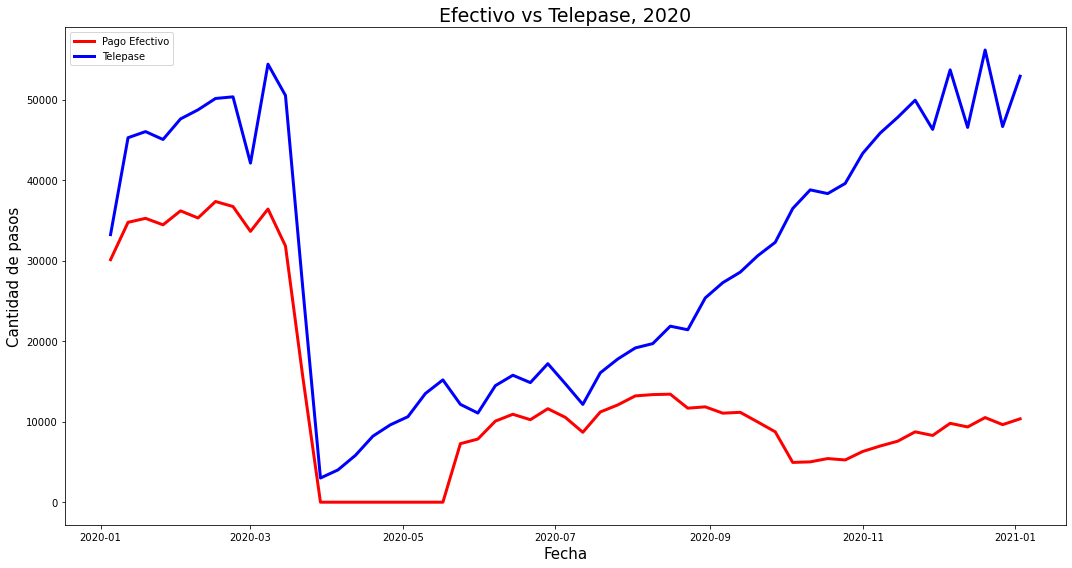

In [36]:
plt.figure(figsize=(15,8))
plt.plot(sema_20.index, sema_20.cantidad_pasos, lw=3, color='red', label='Pago Efectivo')
plt.plot(semat_20.index, semat_20.cantidad_pasos, lw=3, color='blue', label='Telepase')
plt.title('Efectivo vs Telepase, 2020', size=19)
plt.xlabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# Tag o telepase logra recuperarse, impulsado por:
# Mayor agilidad
# Menor manipulacion de efectivo (medidas de bioseguridad)
# efectivo no logra recuperarse y probablemente no lo haga, tag toma fuerza como medio de pago más eficiente

In [38]:
# COparamos entre estaciones
ave= data_20[(data_20.estacion== 'AVELLANEDA')&(data_20.forma_pago=='Efectivo')]
ave

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
11,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,AVELLANEDA,Auto,Efectivo,Efectivo,Centro,542.000000
12,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,AVELLANEDA,Auto,Efectivo,Efectivo,Provincia,596.000000
100,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,2.0,AVELLANEDA,Auto,Efectivo,Efectivo,Centro,255.000000
101,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,2.0,AVELLANEDA,Auto,Efectivo,Efectivo,Provincia,373.000000
170,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,2.0,3.0,AVELLANEDA,Auto,Efectivo,Efectivo,Centro,128.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391590,2020.0,2020-12-30,diciembre,Miércoles,30.0,20.0,21.0,AVELLANEDA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,0.991579
2391599,2020.0,2020-12-30,diciembre,Miércoles,30.0,22.0,23.0,AVELLANEDA,Pesados 6 Ejes,Efectivo,Efectivo,Centro,0.991579
2391605,2020.0,2020-12-30,diciembre,Miércoles,30.0,23.0,0.0,AVELLANEDA,Pesados 6 Ejes,Efectivo,Efectivo,Centro,0.991579
2391613,2020.0,2020-12-31,diciembre,Jueves,31.0,7.0,8.0,AVELLANEDA,Pesados 6 Ejes,Efectivo,Efectivo,Centro,0.991579


In [39]:
# Quitamos las columnas que no utilizaremos
ave.drop(columns=['periodo', 'hora_inicio', 'estacion', 'tipo_vehiculo', 'forma_pago', 'observacion', 'sentido', 'dia_fecha'], inplace=True)
# Pasamos la columna de fecha a formato de datetime y le ponemos hora_fin como hora
ave['fecha2']= pd.to_datetime(ave.fecha)+ pd.to_timedelta(ave.hora_fin, unit='h')
# Quitamos las columnas fecha y hora_fin
ave.drop(columns=['fecha', 'hora_fin'], inplace=True)
# Cambiamos el nombre de fecha2 por fecha
ave.rename(columns={'fecha2':'fecha'}, inplace=True)
# Ordenamos la fecha
ave.sort_values('fecha', inplace=True)
ave.reset_index(drop=True, inplace=True)
# Y por ultimo resampleamos por dia
ave = ave.resample('D', on='fecha').sum()
ave

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-39-cdaae179c384>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ave['fecha2']= pd.to_datetime(ave.fecha)+ pd.to_timedelta(ave.hora_fin, unit='h')
/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,cantidad_pasos
fecha,
2020-01-01,42236.000000
2020-01-02,55496.000000
2020-01-03,63279.000000
2020-01-04,54679.000000
2020-01-05,45192.000000
...,...
2020-12-27,15424.009922
2020-12-28,19751.260278
2020-12-29,19999.155005


In [40]:
# Resampleo por media semanal
ave = ave.resample('W').mean()
ave.shape

(53, 1)

In [41]:
avet = data_20[(data_20.estacion=='AVELLANEDA')&(data_20.forma_pago== 'Tag')]
avet

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
21,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,AVELLANEDA,Auto,Tag,Tag - PosPago,Centro,361.000000
22,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,AVELLANEDA,Auto,Tag,Tag - PosPago,Provincia,248.000000
23,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,AVELLANEDA,Auto,Tag,Tag - PosPago OCR,Centro,55.000000
24,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,AVELLANEDA,Auto,Tag,Tag - PosPago OCR,Provincia,194.000000
25,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,AVELLANEDA,Auto,Tag,Tag - PrePago,Centro,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391656,2020.0,2020-12-31,diciembre,Jueves,31.0,19.0,20.0,AVELLANEDA,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,0.991579
2391657,2020.0,2020-12-31,diciembre,Jueves,31.0,19.0,20.0,AVELLANEDA,Pesados 6 Ejes,Tag,Tag - PosPago,Provincia,1.983158
2391658,2020.0,2020-12-31,diciembre,Jueves,31.0,20.0,21.0,AVELLANEDA,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,2.974737
2391659,2020.0,2020-12-31,diciembre,Jueves,31.0,20.0,21.0,AVELLANEDA,Pesados 6 Ejes,Tag,Tag - PosPago OCR,Centro,0.991579


In [42]:
# Quitamos las columnas que no utilizaremos
avet.drop(columns=['periodo', 'hora_inicio', 'estacion', 'tipo_vehiculo', 'forma_pago', 'observacion', 'sentido', 'dia_fecha'], inplace=True)
# Pasamos la columna de fecha a formato de datetime y le ponemos hora_fin como hora
avet['fecha2']= pd.to_datetime(avet.fecha)+ pd.to_timedelta(avet.hora_fin, unit='h')
# Quitamos las columnas fecha y hora_fin
avet.drop(columns=['fecha', 'hora_fin'], inplace=True)
# Cambiamos el nombre de fecha2 por fecha
avet.rename(columns={'fecha2':'fecha'}, inplace=True)
# Ordenamos la fecha
avet.sort_values('fecha', inplace=True)
avet.reset_index(drop=True, inplace=True)
# Y por ultimo resampleamos por dia
avet = avet.resample('D', on='fecha').sum()
avet

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-42-4713ebe217d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avet['fecha2']= pd.to_datetime(avet.fecha)+ pd.to_timedelta(avet.hora_fin, unit='h')
/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

,cantidad_pasos
fecha,
2020-01-01,34472.000000
2020-01-02,66620.000000
2020-01-03,70394.000000
2020-01-04,45360.000000
2020-01-05,36395.000000
...,...
2020-12-27,57127.835655
2020-12-28,104134.625391
2020-12-29,106664.143187


In [43]:
# Resampleo por la media semanal
avet= avet.resample('W').mean()
avet.shape

(53, 1)

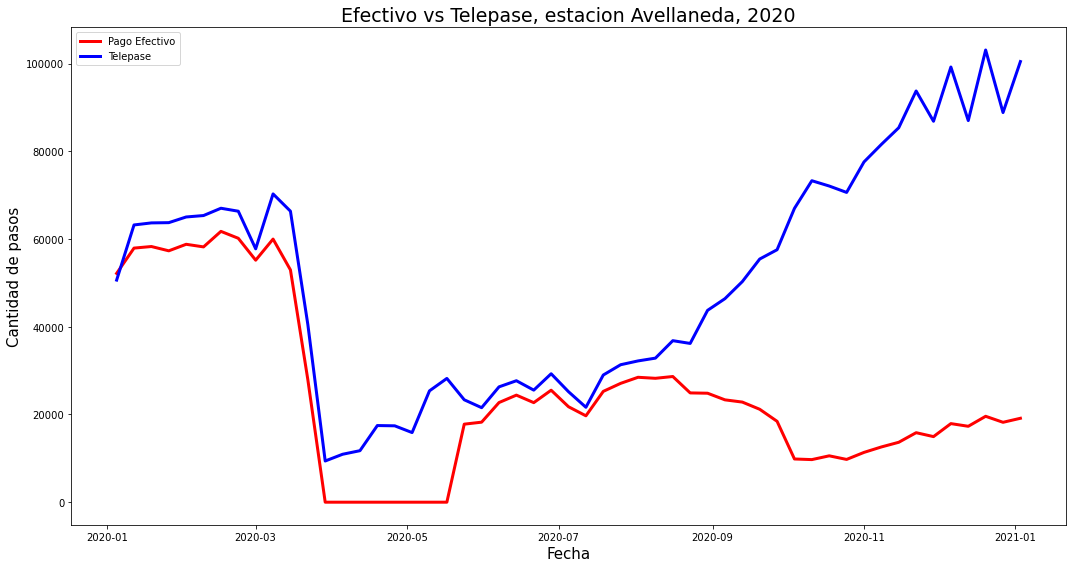

In [46]:
# Grafica
plt.figure(figsize=(15,8))
plt.plot(ave.index, ave.cantidad_pasos, lw=3, color='red', label='Pago Efectivo')
plt.plot(avet.index, avet.cantidad_pasos, lw=3, color='blue', label='Telepase')
plt.title('Efectivo vs Telepase, estacion Avellaneda, 2020', size=19)
plt.xlabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
# Mismo comportamiento, obtenemos la misma tendencia
# Telepase tuvo movimiento durante las medidas restrictivas
# Tag o telepase logra recuperarse, impulsado por:
# Mayor agilidad
# Menor manipulacion de efectivo (medidas de bioseguridad)
# efectivo no logra recuperarse y probablemente no lo haga, tag toma fuerza como medio de pago más eficiente

In [48]:
# Se unifica data set y se unen todos los años
dias = pd.concat([diario, diario20])

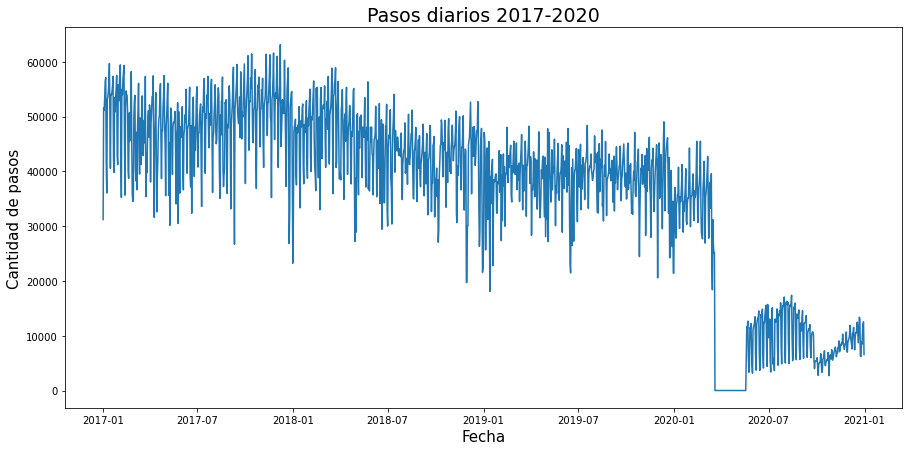

In [49]:
plt.figure(figsize=(15,7))
plt.plot(dias.index, dias.cantidad_pasos)
plt.title('Pasos diarios 2017-2020', size=19)
plt.xlabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.show()

In [50]:
# Realizamos prueba dickey fuller

from statsmodels.tsa.stattools import adfuller

xx = dias.cantidad_pasos
result = adfuller(xx)
print("Adf: ", result[0])
print('p-value: ', result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# Obtenemos serie estacionaria, nuestra serie no depende del tiempo

Adf:  -0.9205438968209833
p-value:  0.7811317586249511
Critical Values: 
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [51]:
# Modificaremos el choque exogeno de covid
# daremos valor de 1 a envento donde pases son menores estrictos a 100

Cuarentena = []
for x in dias['cantidad_pasos']:
    if x < 100:
        x = 0
    else:
        x = 1
    
    Cuarentena.append(x)

print(len(Cuarentena))
dias.shape

1461


(1461, 1)

In [52]:
# Unimos la variable al dataset semanal construido
# decidimos incluirla porque entendemos este choque exogeno como un choque con efecto permanente

dias['exog'] = Cuarentena
# Verificamos las semanas que tomó.
ss = dias[(dias.exog == 0)]
ss.shape

(60, 2)

In [53]:
# Autocorrelación

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

In [54]:
nlags= 52 * 3
autoc= acf(dias.cantidad_pasos, nlags= nlags, fft=False)
autoc.shape

(157,)

Text(0.5, 0, 'lag')

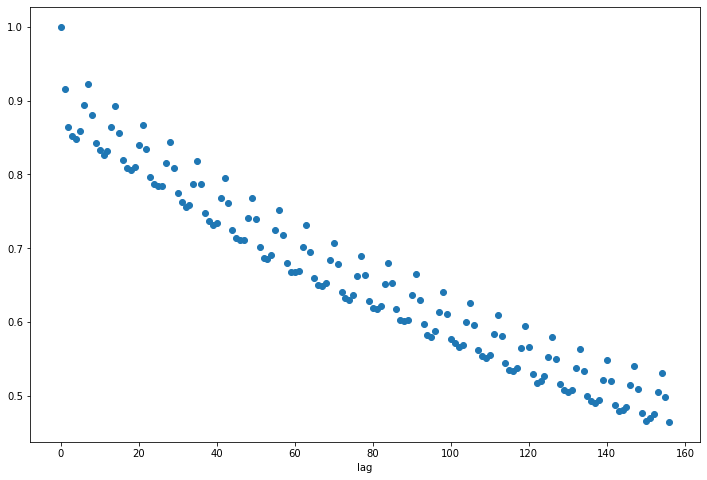

In [57]:
plt.figure(figsize = (12,8))
plt.scatter(np.arange(nlags+1), autoc)
plt.xlabel('lag')

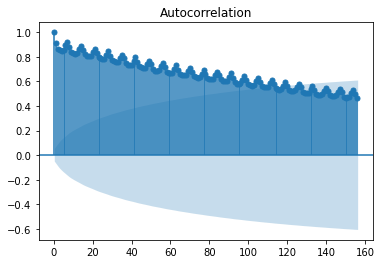

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dias.cantidad_pasos, lags = nlags)
plt.show()

In [59]:
# Tenemos 16 semanas por fuera del intervalo de confianza

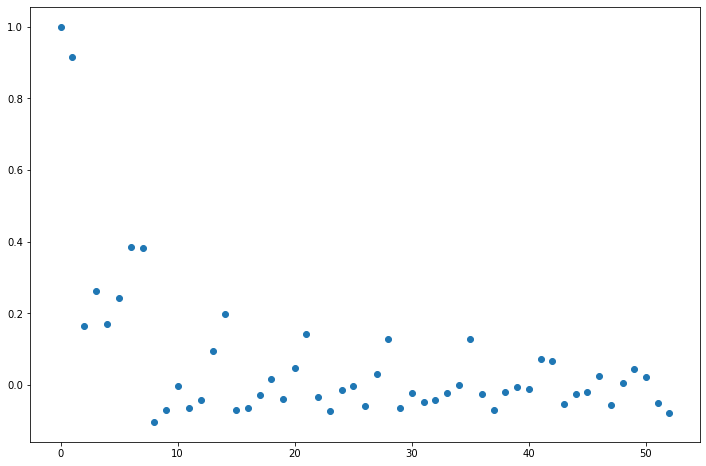

In [61]:
Nlags= 52
pautoc= pacf(dias.cantidad_pasos, nlags= Nlags)
pautoc.shape

plt.figure(figsize=(12,8))
plt.scatter(np.arange(Nlags+1), pautoc)
plt.show()

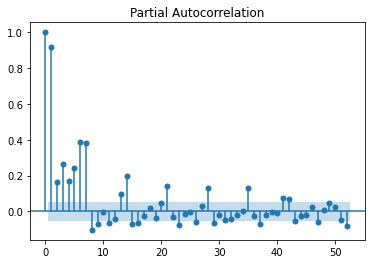

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dias.cantidad_pasos, lags = Nlags)
plt.show()

In [63]:
# Tenemos proceso autoregresivo de 8

In [64]:
# Construcción de Modelos
# Arima One-Step
# se va a predecir último trimestre del 2020 buscando definir hiperparámetros 
# luego pasaremos a la predicción del año 2021

# Variables
# p = La p es el orden del modelo autorregresivo.
# d = El grado de diferenciación.
# q = Es el orden del proceso de la media movil

In [65]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose

In [66]:
# incluimos choque exogeno COVID
y = dias.cantidad_pasos
exog = dias.exog

In [67]:
d=range(0,3)
p=q=range(7,16)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(7, 0, 8) x (7, 0, 8, 12)
SARIMAX:(7, 0, 8) x (7, 0, 9, 12)
SARIMAX:(7, 0, 9) x (7, 0, 10, 12)
SARIMAX:(7, 0, 9) x (7, 0, 11, 12)


In [68]:
model1 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultado1 = model1.fit()

print(resultado1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                      cantidad_pasos   No. Observations:                 1461
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood              -14526.335
Date:                             Tue, 11 May 2021   AIC                          29060.670
Time:                                     20:36:45   BIC                          29081.796
Sample:                                 01-01-2017   HQIC                         29068.553
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5697      0.023     24.748      0.000       0.525       0.615
ar.S.L7        0.9925      

In [69]:
# Probamos parametro del proyecto anterior
# Decidimos no incluir la variable del choque exogeno, no aporta de forma eficiente

[]

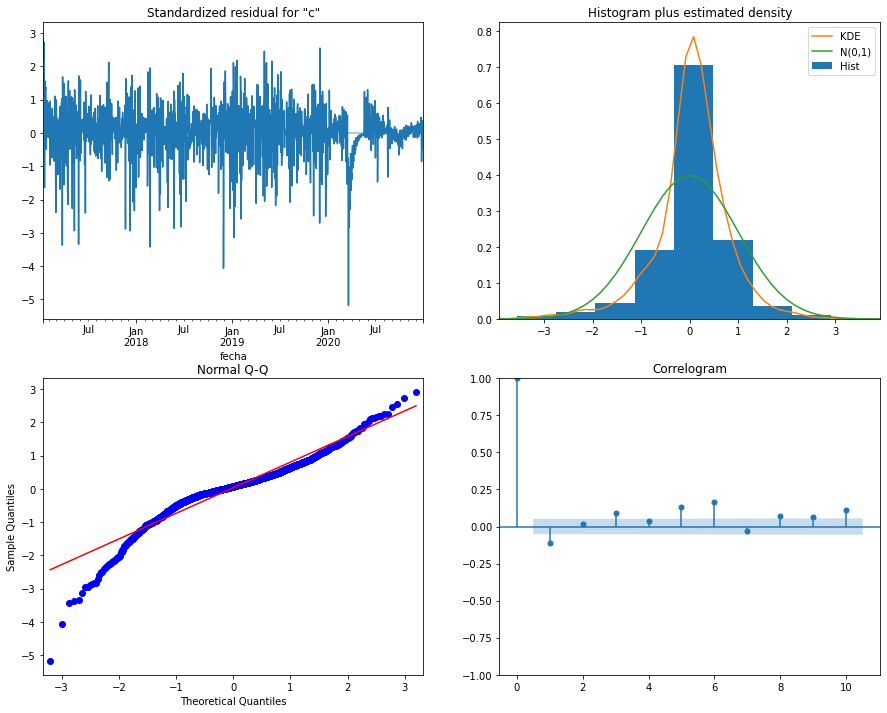

In [70]:
resultado1.plot_diagnostics(figsize=(15,12))
plt.plot()

In [71]:
# Se desgloza modelo
# Residuo tiene la media en 0
# Distribución del residuo, donde tanto como para N 0,1 y KDE media cero
# Errores tienen una relación lineal
# Error no tiene una correlación con versiones rezagadas de sí mismo
# Todos buenos indicadores que el modelo funciona de forma correcta

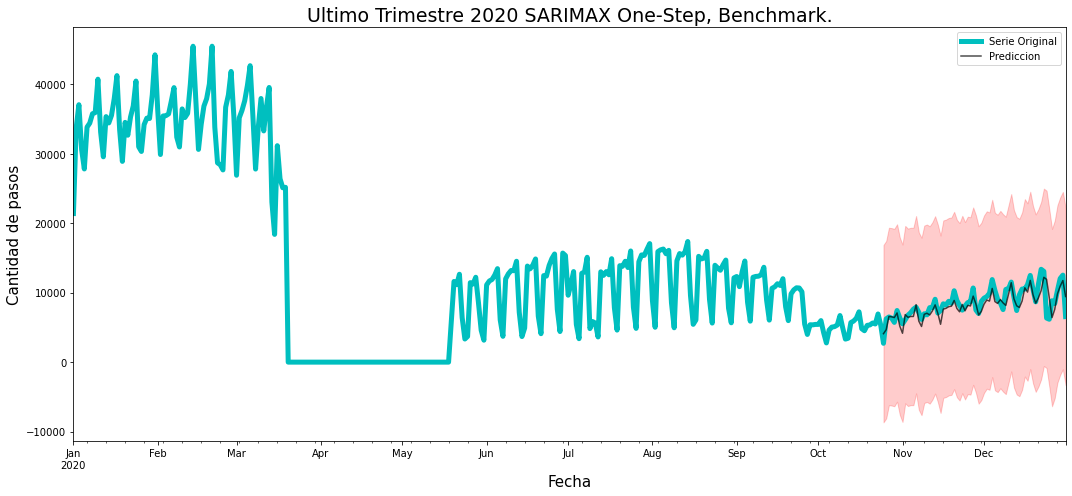

In [72]:
pred1 = resultado1.get_prediction(start=datetime.datetime(2020,10,25), dynamic=False)
c_pred1 = pred1.conf_int()
ax = y['2020':].plot(label='Serie Original',color='c',lw = 5,figsize=(15,7))

pred1.predicted_mean.plot(ax=ax, label='Prediccion', alpha=0.7, color='Black')

ax.fill_between(c_pred1.index,
                c_pred1.iloc[:, 0],
                c_pred1.iloc[:, 1], color='red', alpha=0.2)
plt.title("Ultimo Trimestre 2020 SARIMAX One-Step, Benchmark.", fontsize=19)
plt.xlabel('Fecha',size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
# Prediccion, linea negra, se comporta de forma esperada, predice el comportamiento

In [74]:
y_forecasted1 = pred1.predicted_mean
y_truth = y['2020-10-25':]

rmse1 = np.sqrt(mean_squared_error(y_truth, y_forecasted1))
print('RMSE Benchmark: ', rmse1)

RMSE Benchmark:  1358.1304009202788


In [76]:
# RMSE con mejor modelo de proyecto pasado cambia, ya que incluimos año atipico, con un periodo de tiempo que nos deja datos en cero
# con año donde por coyuntura se migra de medio de pago efectivo a medio de pago tag

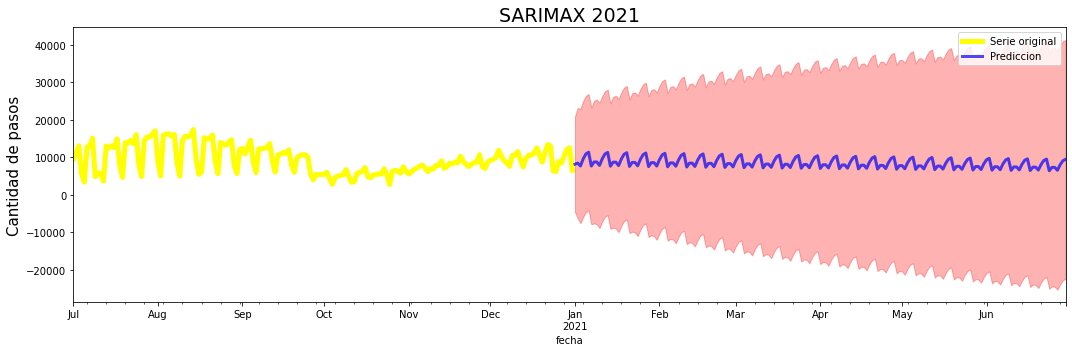

In [75]:
pred = resultado1.get_forecast(steps= datetime.datetime(2021, 6, 30), dynamic= False)
c_pred= pred.conf_int()

ax= y['2020-07-01':].plot(label='Serie original', color='yellow', lw=5, figsize=(15,5))

pred.predicted_mean.plot(ax=ax, label='Prediccion', color='Blue', lw=3, alpha=0.7)

ax.fill_between(c_pred.index, c_pred.iloc[:,0], c_pred.iloc[:,1], color='red', alpha=0.3)

plt.title('SARIMAX 2021', size=19)
plt.ylabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
# Modelo benchmark nos dice que para 2021
# medio de pago efectivo va a ocilar entre 5000 y 10000
# manteniendo la ocilacion constante entre esos valores
# Intervalo de confianza crece con el tiempo
# es normal para estos modelo que predicen mejor a corto plazo

In [82]:
# Prophet
# Vamos a implementar la herramienta de facebook prophet
# herramienta para pronosticar series de tiempo
# modelo aditivo
from fbprophet import Prophet

In [83]:
diarioP = dias.copy()
diarioP = diarioP.drop('exog', axis=1)
diarioP= diarioP.reset_index()
diarioP= diarioP.rename(columns={'fecha': 'ds',
                    'cantidad_pasos': 'y'})
diarioP

,ds,y
0,2017-01-01,31183.0
1,2017-01-02,51568.0
2,2017-01-03,51093.0
3,2017-01-04,53332.0
4,2017-01-05,56486.0
...,...,...
1456,2020-12-27,8434.0
1457,2020-12-28,10311.0
1458,2020-12-29,12036.0
1459,2020-12-30,12527.0


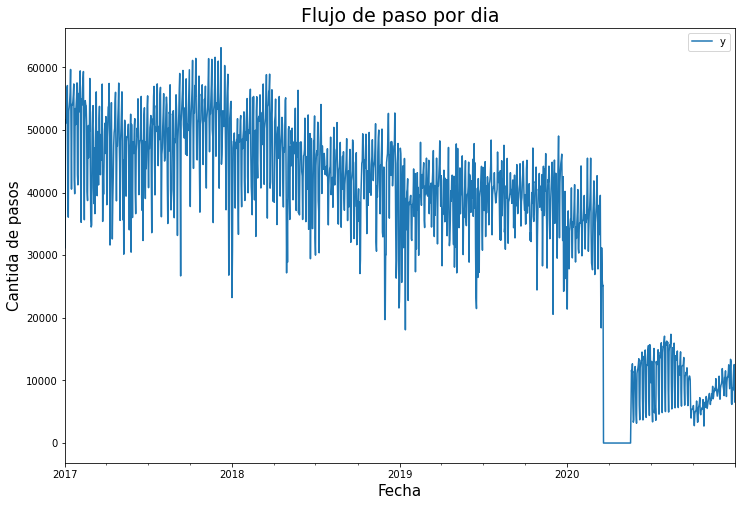

In [84]:
ax = diarioP.set_index('ds').plot(figsize=(12,8))

plt.title('Flujo de paso por dia', size= 19)
plt.xlabel('Fecha', size=15)
plt.ylabel('Cantida de pasos', size=15)

plt.show()

In [85]:
ProfetM = Prophet(seasonality_mode='multiplicative', interval_width=0.95, changepoint_prior_scale= 0.9)
ProfetM.fit(diarioP)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:
future1 = ProfetM.make_future_dataframe(periods=365, freq='D')
future1.head()

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05


In [87]:
future1.tail()

,ds
1821,2021-12-27
1822,2021-12-28
1823,2021-12-29
1824,2021-12-30
1825,2021-12-31


In [88]:
y_fores1 = ProfetM.predict(future1)
y_fores1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-01,41615.855699,31664.465999,52050.786557
1,2017-01-02,49348.424763,39467.139045,59474.611531
2,2017-01-03,50434.759817,39766.214197,60744.178994
3,2017-01-04,52448.807631,42408.596222,62886.447676
4,2017-01-05,53846.045373,43626.983851,64389.676339


In [89]:
y_fores1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2021-12-27,2700.405010,-94793.583067,108260.617639
1822,2021-12-28,2741.346567,-98840.012013,113293.505232
1823,2021-12-29,2829.754646,-101782.857125,115569.871803
1824,2021-12-30,2885.234773,-105283.912283,115201.469800
1825,2021-12-31,2992.945164,-106414.023897,127607.951814


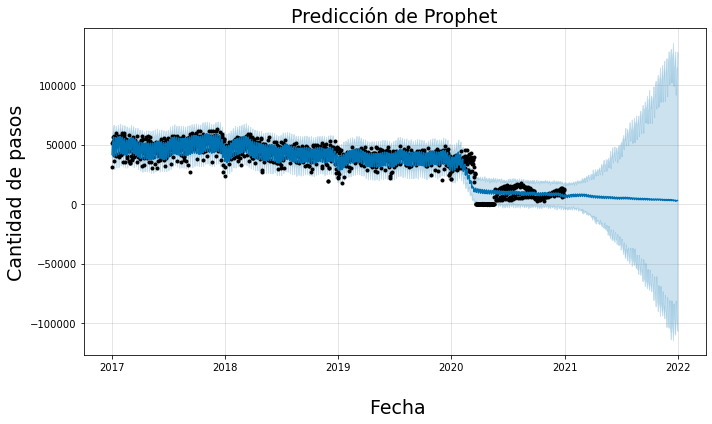

In [91]:
fig1 = ProfetM.plot(y_fores1)
plt.title("Predicción de Prophet", fontsize=19)
plt.xlabel('\n Fecha', fontsize=19)
plt.ylabel('Cantidad de pasos', fontsize=19)
plt.tight_layout()
plt.show()

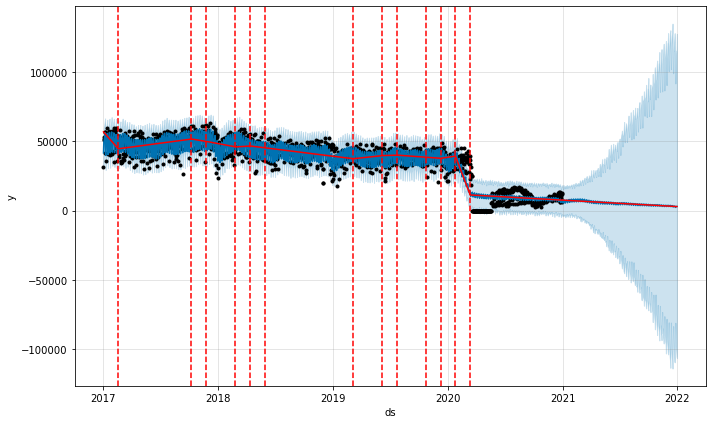

In [92]:
from fbprophet.plot import add_changepoints_to_plot
cambio_tend = ProfetM.plot(y_fores1)
a= add_changepoints_to_plot(cambio_tend.gca(), ProfetM, y_fores1)

In [93]:
# Puntos negros son los datos que analiza el modelo
# Linea azul oscura son los datos predichos, la predicción del modelo
# la zona azul el intervlo de confianza
# la linea punteada roja marca los cambio de tendencia, tendencias que parecen variar por temporadas verano e invierno
# durante el año 2020 en pandemia resulta más complicado la prediccion, no hay cambio fuertes despues del inicio de la coyuntura
# el modelo parece funcionar bien, muestra prediccion esta entre el intervalo de confianza
# medio de pago en efectivo tiende a disminuir en el tiempo, posiblemente va a desaparecer

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


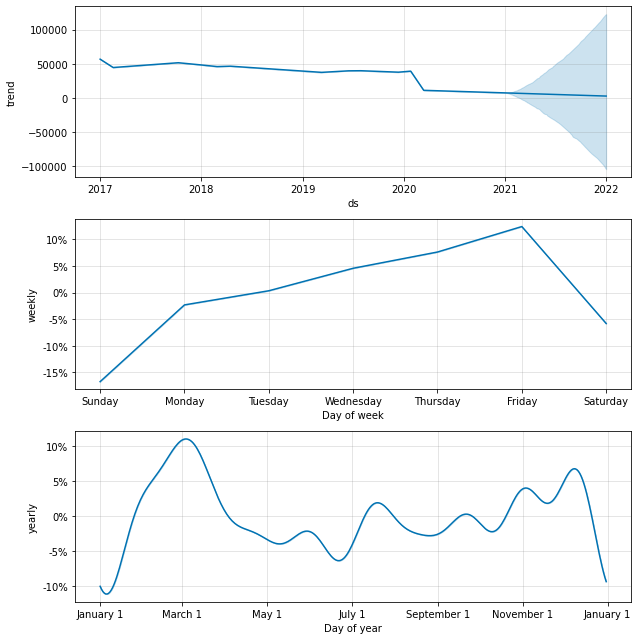

In [94]:
ProfetM.plot_components(y_fores1)
plt.show()

# grafico 1: tendencia
# grafico 2: comportamiento semanal, viernes resulta ser el día con mayor flujo vehicular
# grafico 3: flujo anual

In [95]:
y_fores1.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'yhat'],
      dtype='object')

In [96]:
# se crea el dataset de Prophet con la predicción del año 2020 para comprobar el comportamiento

In [97]:
profet20 = y_fores1[(y_fores1.ds >= '2020-10-25')&(y_fores1.ds <= '2020-12-31')]
profet20.drop(columns=["trend", "yhat_lower", "yhat_upper",
                       "trend_lower", "trend_upper", "additive_terms",
                       "additive_terms_lower", "additive_terms_upper",
                       "yearly", "yearly_lower", "yearly_upper", 
                       "multiplicative_terms", "multiplicative_terms_lower", 
                       "multiplicative_terms_upper", "weekly", "weekly_lower",
                       "weekly_upper"], inplace= True)
profet20.rename(columns={'ds': 'fecha', 'yhat': 'cantidad_pasos'}, inplace=True)
profet20 = profet20.set_index('fecha')
profet20.tail()

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,cantidad_pasos
fecha,
2020-12-27,5837.986843
2020-12-28,6859.556413
2020-12-29,6989.893989
2020-12-30,7244.556611
2020-12-31,7416.096283


In [98]:
y_pred= profet20.cantidad_pasos['2020-10-25': '2020-12-31']
y_truth = y['2020-10-25':'2020-12-31']

rmse = np.sqrt(mean_squared_error(y_pred,y_truth))
print('RMSE para Prophet: ', rmse)

RMSE para Prophet:  2219.503439298855


In [99]:
# modelo benchmark SARIMAX One-Step es suprerior en cuanto al Prophet

In [100]:
pred = resultado1.get_prediction(start=datetime.datetime(2020,10,25), dynamic=False)
sarimax20 = pred.predicted_mean
sarimax20 = pd.DataFrame(sarimax20)

sarimax20.rename(columns={'predicted_mean': 'cantidad_pasos'}, inplace=True)

sarimax20= sarimax20.set_index(sarimax20.index)

sarimax20.head()

,cantidad_pasos
fecha,
2020-10-25,4095.106056
2020-10-26,4674.245618
2020-10-27,6577.590951
2020-10-28,6523.523557
2020-10-29,6420.429887


In [101]:
ygraf= dias[(dias.index >= '2020-07-01') & (dias.index <= '2020-12-31')]
ygraf= ygraf.drop('exog', axis=1)
ygraf

,cantidad_pasos
fecha,
2020-07-01,9632.0
2020-07-02,11203.0
2020-07-03,13041.0
2020-07-04,5436.0
2020-07-05,3376.0
...,...
2020-12-27,8434.0
2020-12-28,10311.0
2020-12-29,12036.0


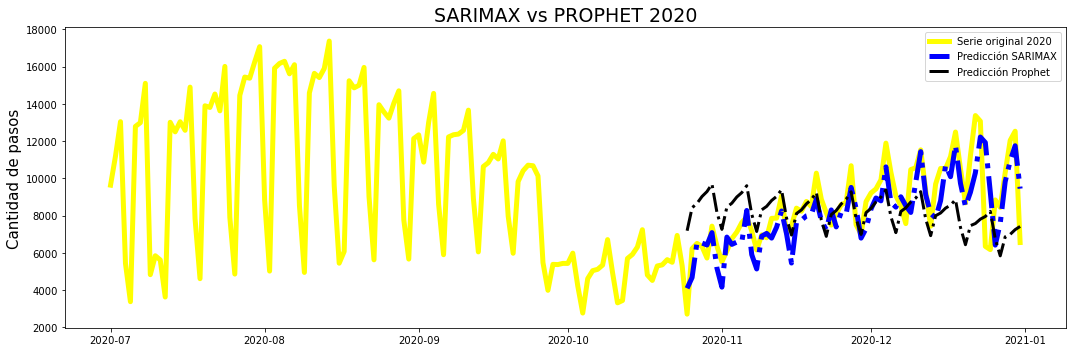

In [102]:
plt.figure(figsize=(15,5))

plt.plot(ygraf.index, ygraf.cantidad_pasos, color='yellow', lw=5, label='Serie original 2020')
plt.plot(sarimax20.index, sarimax20.cantidad_pasos,'-.' ,color='blue', lw=5 , label='Predicción SARIMAX')
plt.plot(profet20.index, profet20.cantidad_pasos,'-.', color='black', lw=3, label='Predicción Prophet')

plt.title('SARIMAX vs PROPHET 2020', size=19)
plt.ylabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

In [103]:
# Vemos que para el 2020 el SARIMAX que elegimos como modelo Benchmark funciona mejor que el Prophet en este caso 
# Podríamos deducir que el modelo Prophet le dió mucho peso a la cuarentena y la predicción tendió ir a la baja

In [104]:
# veamos prediccion para año 2021

In [105]:
profet21 = y_fores1[(y_fores1.ds >= '2021-01-01')&(y_fores1.ds <= '2021-06-30')]
profet21.drop(columns=["trend", "yhat_lower", "yhat_upper",
                       "trend_lower", "trend_upper", "additive_terms",
                       "additive_terms_lower", "additive_terms_upper",
                       "yearly", "yearly_lower", "yearly_upper", 
                       "multiplicative_terms", "multiplicative_terms_lower", 
                       "multiplicative_terms_upper", "weekly", "weekly_lower",
                       "weekly_upper"], inplace= True)
profet21.rename(columns={'ds': 'fecha', 'yhat': 'cantidad_pasos'}, inplace=True)
profet21 = profet21.set_index('fecha')
profet21.tail()

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/pandas/core/frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,cantidad_pasos
fecha,
2021-06-26,4681.882787
2021-06-27,4105.529643
2021-06-28,4872.618004
2021-06-29,5018.508975
2021-06-30,5248.100833


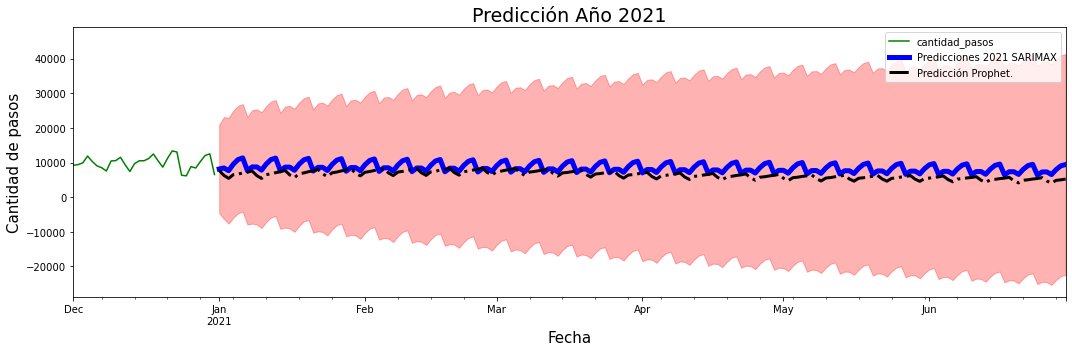

In [106]:
pred_f = resultado1.get_forecast(steps=datetime.datetime(2021,6,30))
c_predf = pred_f.conf_int()

ax = diario20.plot(label='Cantidad_pasos', color='green',figsize=(15,5))
pred_f.predicted_mean.plot(ax=ax, label='Predicciones 2021 SARIMAX', color='blue', lw=5)
ax.fill_between(c_predf.index,
                c_predf.iloc[:, 0],
                c_predf.iloc[:, 1], color='red', alpha=.3)
plt.plot(profet21.index, profet21.cantidad_pasos,'-.', color='black', lw=3, label= 'Predicción Prophet.')
plt.title("Predicción Año 2021", fontsize=19)
ax.set_xlabel('Fecha', size=15)
ax.set_ylabel('Cantidad de pasos', size=15)
plt.xlim(datetime.datetime(2020,12,1), datetime.datetime(2021,6,30))
plt.legend()
plt.tight_layout()
plt.show()

In [107]:
# Las predicciones del SARIMAX y del Prophet muestran disminución del pago en efectivo para el año 2021 
# podemos afirmar con mayor seguridad que este medio de pago esta siendo reemplazado 
# ya que cada vez la gente usa más el Telepase (tag) por los beneficios en agilida
# también higiene y seguridad.

In [108]:
# LSTM
# Como ultimo paso vamos a probar red neuronal, proceso de Long Short Term Memory

In [112]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [113]:
df1 = dias.copy()
df1 = df1.drop('exog', axis=1)
df1.shape

(1461, 1)

In [114]:
X = df1.values
train, test= X[0:-365], X[-365:]

# Creamos test y train
# test año 2020
# train 2017-2019

In [115]:
# creamos bucle para tener pasos en el tiempo
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # make prediction
    predictions.append(history[-1])
    # observation
    history.append(test[i])

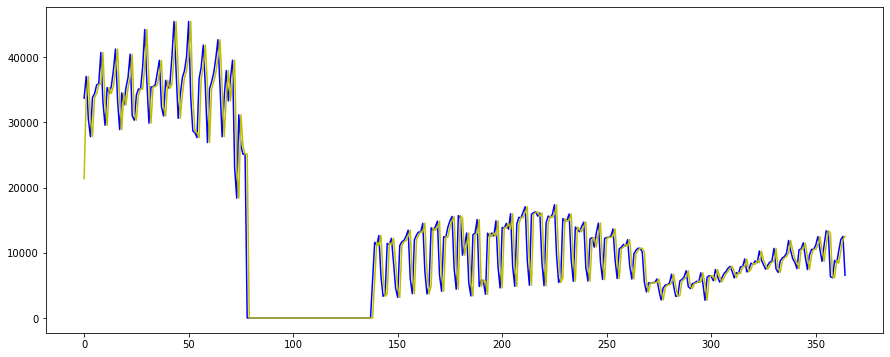

In [120]:
plt.figure(figsize=(15,6))
plt.plot(test, color='Blue')
plt.plot(predictions, color='y')
plt.show()

In [121]:
RMSE = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: ', RMSE)

RMSE:  3964.8744339149416


In [122]:
# Para usar la red neuronal LSTM debemos tener datos de entrada X y datos de salida y 
# Para esto podemos usar como entrada la observación del paso del tiempo (t-1) 
# y como salida la observación del paso del tiempo actual (t).

# vamos a usar un modelo para hacer un pronóstico para el paso de tiempo, 
# luego se tomará el valor esperado real del conjunto de prueba y 
# se pondrá a disposición del modelo para el pronóstico en el próximo paso de tiempo.

In [123]:
def sdt_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [124]:
# Creamos una función para escalar los datos con MinMaxScaler entre -1 y 1, 
# este tipo de red neuronal actúan mejor y el modelo puede llegar a tener cierta ventaja con este tipo de proceso

In [125]:
def scale(train, test):
    # Entrenamos el escalador
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # Transformamos train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # Transformamos test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [126]:
# otra función la cual nos va a devolver los valores escalados a valores reales

In [127]:
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [128]:
# siguiente función entrenará una red neuronal secuencial

In [129]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    # Definimos y le damos la forma a X e y
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    # Definimos el modelo y lo configuramos con sus parámetros
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    # Lo hacemos recorrer el parámetro Epoch
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
        return model

In [130]:
# funcion para predicciones del modelo

In [131]:
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [132]:
# pronosticos
valores= df1.values
supervised = sdt_supervised(valores, 1)
val_sup = supervised.values

In [133]:
train, test = val_sup[0:-365], val_sup [-365:]

In [134]:
# datos escalados
scaler, train_scaled, test_scaled= scale(train, test)

In [135]:
# Ahora creamos un bucle, repetimos la red neuronal LSTM para ver los mejores resultados

In [136]:
repeticiones = 30
lista_errores= []
for x in range(repeticiones):
    # Entrenamos el modelo
    lstm = fit_lstm(train_scaled, 1, 1000, 3)
    # Pronosticamos todo el conjunto de datos de entrenamiento para construir el estado para la previsión
    train_reshape = train_scaled[:,0].reshape(len(train_scaled), 1,1)
    lstm.predict(train_reshape, batch_size=1)
    # Validación de avance en los datos de prueba
    predic = list()
    for i in range(len(test_scaled)):
        # Predicción One Step
        X, y =  test_scaled[i,0: -1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm, 1, X)
        # invertimos la escala
        yhat = invert_scale(scaler, X, yhat)
        predic.append(yhat)

    rmses = np.sqrt(mean_squared_error(valores[-365:],predictions))
    print('Test RMSE: ', x+1, rmses)
    lista_errores.append(rmses)

Test RMSE:  1 3964.8744339149416
Test RMSE:  2 3964.8744339149416
Test RMSE:  3 3964.8744339149416
Test RMSE:  4 3964.8744339149416
Test RMSE:  5 3964.8744339149416
Test RMSE:  6 3964.8744339149416
Test RMSE:  7 3964.8744339149416
Test RMSE:  8 3964.8744339149416
Test RMSE:  9 3964.8744339149416
Test RMSE:  10 3964.8744339149416
Test RMSE:  11 3964.8744339149416
Test RMSE:  12 3964.8744339149416
Test RMSE:  13 3964.8744339149416
Test RMSE:  14 3964.8744339149416
Test RMSE:  15 3964.8744339149416
Test RMSE:  16 3964.8744339149416
Test RMSE:  17 3964.8744339149416
Test RMSE:  18 3964.8744339149416
Test RMSE:  19 3964.8744339149416
Test RMSE:  20 3964.8744339149416
Test RMSE:  21 3964.8744339149416
Test RMSE:  22 3964.8744339149416
Test RMSE:  23 3964.8744339149416
Test RMSE:  24 3964.8744339149416
Test RMSE:  25 3964.8744339149416
Test RMSE:  26 3964.8744339149416
Test RMSE:  27 3964.8744339149416
Test RMSE:  28 3964.8744339149416
Test RMSE:  29 3964.8744339149416
Test RMSE:  30 3964.874

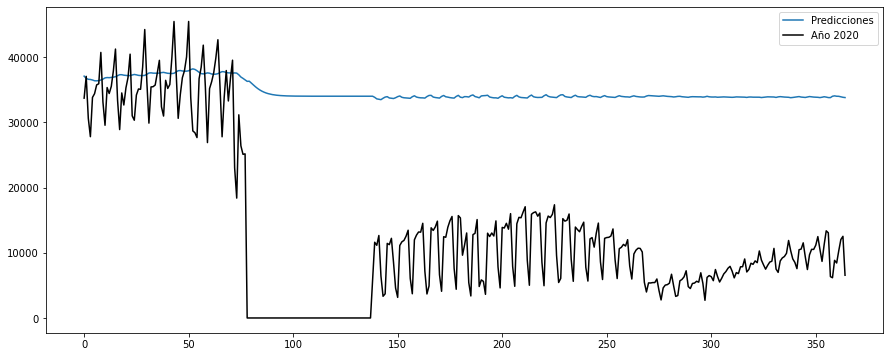

In [137]:
plt.figure(figsize=(15,6))
plt.plot(predic, label='Predicciones')
plt.plot(valores[-365:], color='black', label='Año 2020')
plt.legend()
plt.show()

In [138]:
# RMSE se mantuvo constante
# Como vemos en el gráfico, período de cuarentena no pronostica bien 
# y nunca pudo realizar una predicción correcta desde ese punto
# es entendible, series de tiempo no pueden predecir choques exogenos

In [139]:
# Comentarios finales
# Cada modelo nos permite analisar aspectos diferentes
# SARIMAX fue el que mejor resultados según RMSE
# Prophet es muy preciso para captar cambios de tendencia
# La red neuronaltiene bastantes dificultades a partir del cambio brusco en la tendencia